In [2]:
import os
from glob import glob
from tifffile import imread
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# HOME = '/home/lis-paul'
HOME = '/home/qzt'
PATH = "data/dsb2018/dsb2018_sub1/"
# PATH = "data/centuri/train/"
# path = os.path.join(HOME, "data/dsb2018/dsb2018_sub1/images/*.tif")
pathX = os.path.join(HOME, PATH+"images/*.tif")
pathY = os.path.join(HOME, PATH+"masks/*.tif")
X_file = sorted(glob(pathX))
Y_file = sorted(glob(pathY))
print(len(X_file), len(Y_file))

X = list(map(imread,X_file))
Y = list(map(imread,Y_file))
# n_channel = 1 if X[0].ndim == 2 else X[0].shape[-1]


292 292


In [4]:
rng = np.random.RandomState(42)
ind = rng.permutation(len(X))
n_val = max(1, int(round(0.15 * len(ind))))
ind_train, ind_val = ind[:-n_val], ind[-n_val:]

## manual assign train/val index for debugging
# ind_train = [1,2,3,4]
# ind_val = [0]

X_val, Y_val = [X[i] for i in ind_val]  , [Y[i] for i in ind_val]
X_trn, Y_trn = [X[i] for i in ind_train], [Y[i] for i in ind_train] 
print('number of images: %3d' % len(X))
print('- training:       %3d' % len(X_trn))
print('- validation:     %3d' % len(X_val))

number of images: 292
- training:       248
- validation:      44


In [10]:
def normalize99(img):
    """ normalize image so 0.0 is 1st percentile and 1.0 is 99th percentile """
    X = img.copy()
    X = (X - np.percentile(X, 1)) / (np.percentile(X, 99) - np.percentile(X, 1))
    return X

In [16]:
def normalize(x, pmin=3, pmax=99.8, axis=None, clip=False, eps=1e-20, dtype=np.float32):
    """Percentile-based image normalization."""

    mi = np.percentile(x,pmin,axis=axis,keepdims=True)
    ma = np.percentile(x,pmax,axis=axis,keepdims=True)
    return normalize_mi_ma(x, mi, ma, clip=clip, eps=eps, dtype=dtype)


def normalize_mi_ma(x, mi, ma, clip=False, eps=1e-20, dtype=np.float32):
    if dtype is not None:
        x   = x.astype(dtype,copy=False)
        mi  = dtype(mi) if np.isscalar(mi) else mi.astype(dtype,copy=False)
        ma  = dtype(ma) if np.isscalar(ma) else ma.astype(dtype,copy=False)
        eps = dtype(eps)

    try:
        import numexpr
        x = numexpr.evaluate("(x - mi) / ( ma - mi + eps )")
    except ImportError:
        x =                   (x - mi) / ( ma - mi + eps )

    if clip:
        x = np.clip(x,0,1)

    return x

In [ ]:
for i,x in enumerate(X):
    print(i, x.min(), x.max())
    x1 = normalize99(x)
    x2 = normalize(x, pmin=1, pmax=99.8)
    print(i, x1.min(), x1.max())
    print(i, x2.min(), x2.max())


In [40]:
def standardize(img):
    return (img-np.mean(img))/np.std(img)

def standardize_batch(img, batch_mean, batch_sd):
    return (img-batch_mean)/batch_sd

In [41]:
bmean, bstd= zip(*[(np.mean(x), np.std(x)) for x in X])

bmean = np.mean(bmean)
bstd = np.mean(bstd)

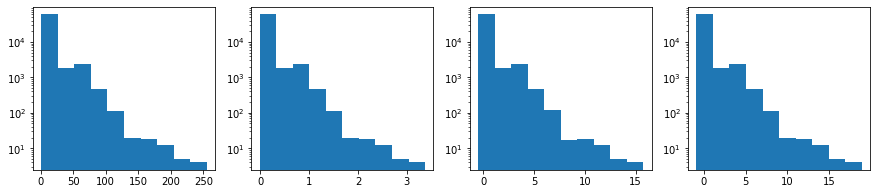

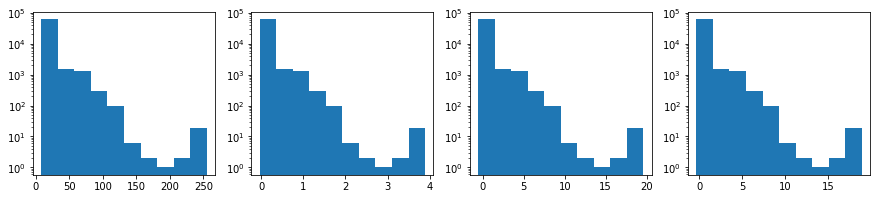

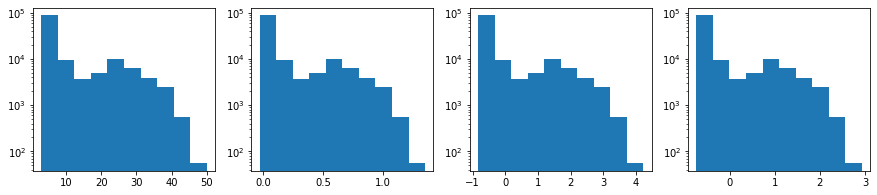

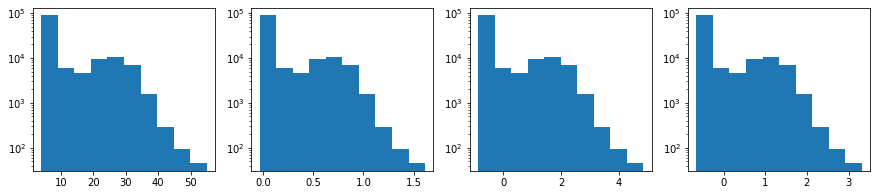

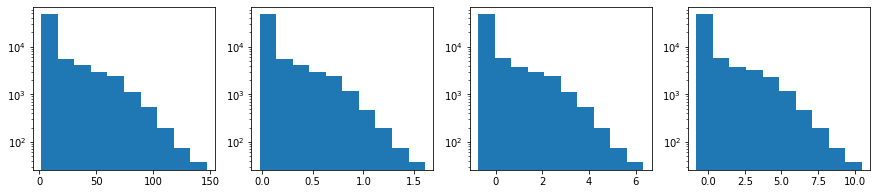

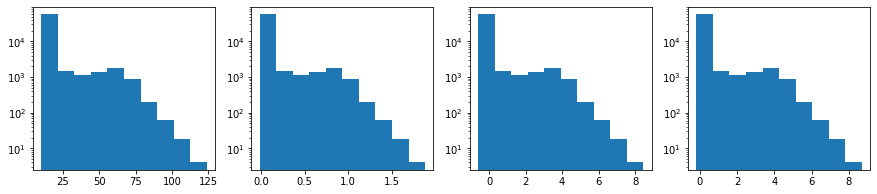

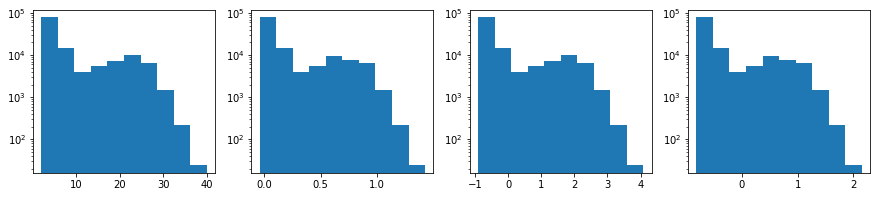

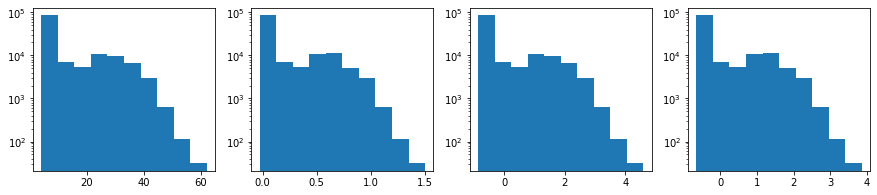

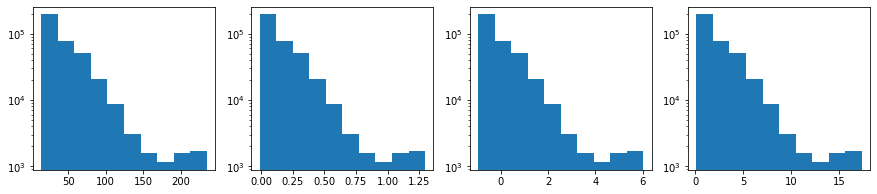

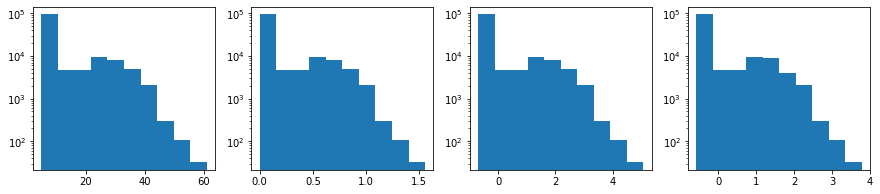

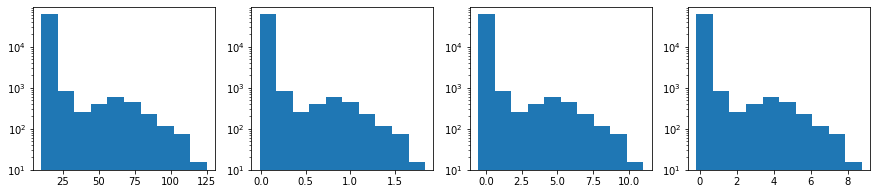

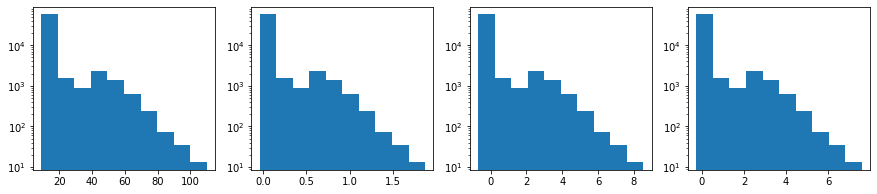

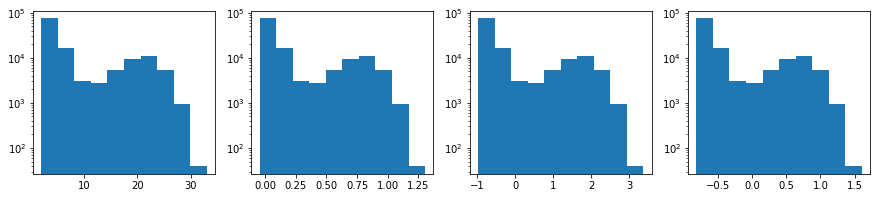

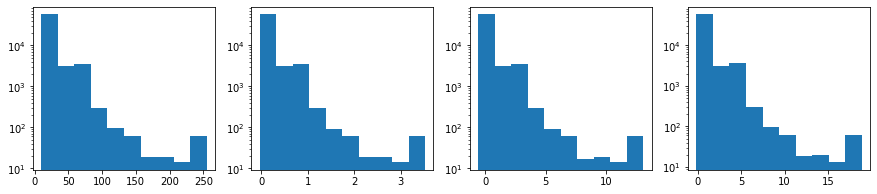

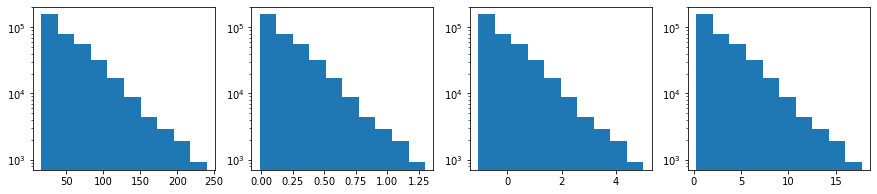

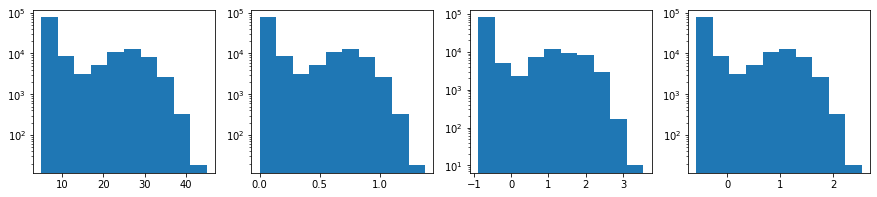

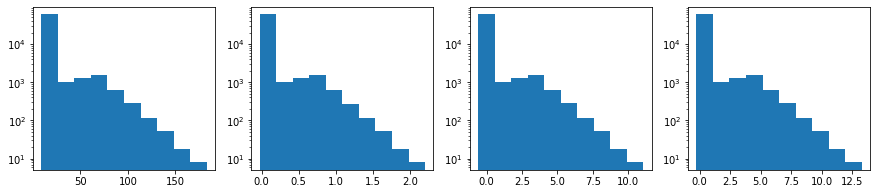

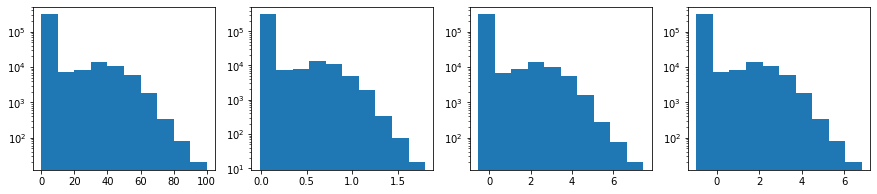

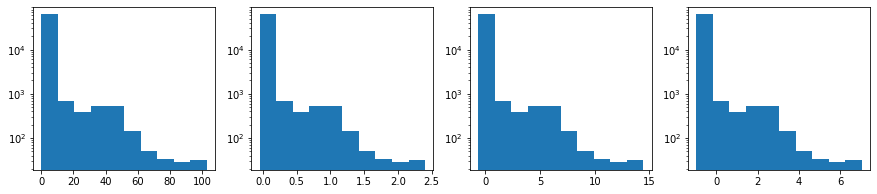

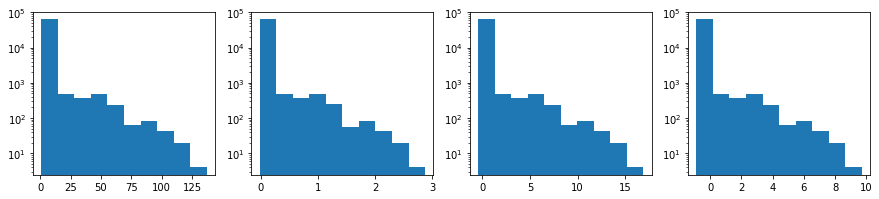

In [43]:
for i,x in enumerate(X[:20]):
#     plt.hist(x.flatten())
#     plt.show()
    plt.figure(figsize=(15,3))
    plt.subplot(141)
    plt.hist(x.flatten())
    plt.yscale('log')

    x1 = normalize99(x)
    plt.subplot(142)
    plt.hist(x1.flatten())
    plt.yscale('log')

    x2 = standardize(x)
    plt.subplot(143)
    plt.hist(x2.flatten())
    plt.yscale('log')
    
    x3 = standardize_batch(x, bmean, bstd)
    plt.subplot(144)
    plt.hist(x3.flatten())
    plt.yscale('log')
    plt.show()
    #     break